# Performance Analysis by Industry and Sector
### Steps to accomplish the goal:
1. [Read the original CSV file.](#Read-the-original-CSV-file.)
2. [Clean data to get necessary data.](#Clean-data-to-get-necessary-data.)
3. [Create a dataframe with top 10 companies.](#Create-a-dataframe-with-top-10-companies.)
4. [Cretae a parallel categories to visualize industry sectors.](#Cretae-a-parallel-categories-to-visualize-industry-sectors.)

### Read the original CSV file.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [2]:
nasdaq_csv = Path("data/nasdaq_companies.csv")
nasdaq_df = pd.read_csv(nasdaq_csv)

In [3]:
nasdaq_df.head()

,Symbol,Name,LastSale,MarketCap,IPOyear,Sector,industry,Summary Quote,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,PIH,"1347 Property Insurance Holdings, Inc.",7.151,$42.8M,2014.0,Finance,Property-Casualty Insurers,http://www.nasdaq.com/symbol/pih,NaN,NaN,NaN
1,TURN,180 Degree Capital Corp.,2.040,$63.49M,NaN,Finance,Finance/Investors Services,http://www.nasdaq.com/symbol/turn,NaN,NaN,NaN
2,FLWS,"1-800 FLOWERS.COM, Inc.",11.050,$714.1M,1999.0,Consumer Services,Other Specialty Stores,http://www.nasdaq.com/symbol/flws,NaN,NaN,NaN
3,FCCY,1st Constitution Bancorp (NJ),18.500,$149.35M,NaN,Finance,Savings Institutions,http://www.nasdaq.com/symbol/fccy,NaN,NaN,NaN
4,SRCE,1st Source Corporation,49.500,$1.28B,NaN,Finance,Major Banks,http://www.nasdaq.com/symbol/srce,NaN,NaN,NaN


### Clean data to get necessary data.

In [4]:
nasdaq_df.drop(columns = ["LastSale","MarketCap","IPOyear","Summary Quote","Unnamed: 8","Unnamed: 9","Unnamed: 10"], inplace = True)
nasdaq_df.head()

,Symbol,Name,Sector,industry
0,PIH,"1347 Property Insurance Holdings, Inc.",Finance,Property-Casualty Insurers
1,TURN,180 Degree Capital Corp.,Finance,Finance/Investors Services
2,FLWS,"1-800 FLOWERS.COM, Inc.",Consumer Services,Other Specialty Stores
3,FCCY,1st Constitution Bancorp (NJ),Finance,Savings Institutions
4,SRCE,1st Source Corporation,Finance,Major Banks


### Create a dataframe with top 10 companies.

In [5]:
tickers = ['APPN','ARGX','BAND','DNLI','HLNE','KRYS','MDB','OKTA','ROKU','ZLAB']

In [6]:
dict_of_top_10 = {}
for ticker in tickers:
    dict_of_top_10[ticker] = nasdaq_df.loc[nasdaq_df['Symbol']== ticker]    

In [8]:
joined_df = pd.concat([dict_of_top_10['APPN']])
for ticker, (key, value) in zip (tickers, dict_of_top_10.items()):
    if ticker != "APPN":
        joined_df = pd.concat([joined_df, dict_of_top_10[ticker]])

In [9]:
joined_df.head()

,Symbol,Name,Sector,industry
198,APPN,Appian Corporation,Technology,Computer Software: Prepackaged Software
231,ARGX,argenx SE,Health Care,Biotechnology: Biological Products (No Diagnos...
329,BAND,Bandwidth Inc.,Technology,Computer Software: Prepackaged Software
813,DNLI,Denali Therapeutics Inc.,Health Care,Biotechnology: Biological Products (No Diagnos...
1344,HLNE,Hamilton Lane Incorporated,Finance,Investment Managers


In [10]:
joined_df.reset_index(drop=True, inplace = True)
joined_df.head()

,Symbol,Name,Sector,industry
0,APPN,Appian Corporation,Technology,Computer Software: Prepackaged Software
1,ARGX,argenx SE,Health Care,Biotechnology: Biological Products (No Diagnos...
2,BAND,Bandwidth Inc.,Technology,Computer Software: Prepackaged Software
3,DNLI,Denali Therapeutics Inc.,Health Care,Biotechnology: Biological Products (No Diagnos...
4,HLNE,Hamilton Lane Incorporated,Finance,Investment Managers


In [36]:
joined_df.to_csv('data/top_10.csv', index = False)

In [12]:
# Finding out how many Sectors we have in the columns
joined_df.pivot_table(index=['Sector'], aggfunc='size')

Sector
Consumer Services    1
Finance              1
Health Care          4
Technology           4
dtype: int64

In [13]:
df = joined_df.sort_values(['Sector', 'industry'])

In [14]:
df.reset_index(drop=True, inplace=True)
df.head()

,Symbol,Name,Sector,industry
0,ROKU,"Roku, Inc.",Consumer Services,Television Services
1,HLNE,Hamilton Lane Incorporated,Finance,Investment Managers
2,ARGX,argenx SE,Health Care,Biotechnology: Biological Products (No Diagnos...
3,DNLI,Denali Therapeutics Inc.,Health Care,Biotechnology: Biological Products (No Diagnos...
4,KRYS,"Krystal Biotech, Inc.",Health Care,Biotechnology: Biological Products (No Diagnos...


### Create a parallel categories to visualize industry sectors.

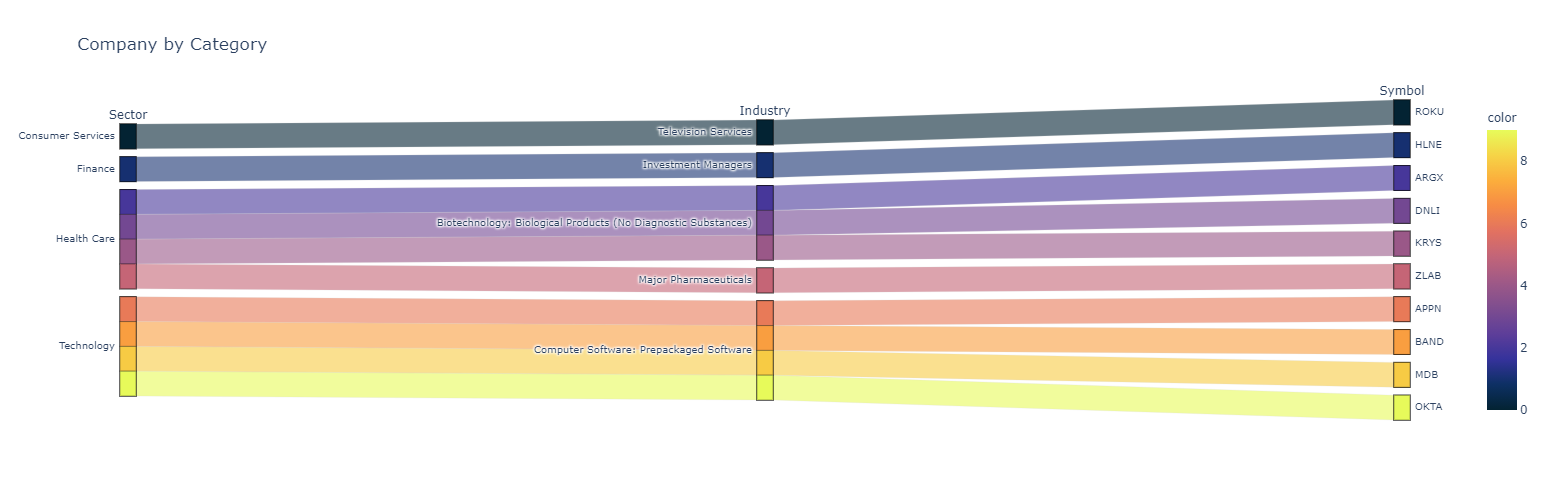

In [37]:
px.parallel_categories(
    df.reset_index(),
    dimensions = ['Sector','industry', 'Symbol'],
    color=df.index,
    color_continuous_scale=px.colors.sequential.thermal,
    labels={'industry': "Industry"},
    width = 1000,
    height = 500,
    title = 'Company by Category'
)